In [1]:
import ROOT
from tqdm import trange
from array import array

Welcome to JupyROOT 6.22/06


## Lumi

In [2]:
# CMS_lumi
#   Initiated by: Gautier Hamel de Monchenault (Saclay)
#   Translated in Python by: Joshua Hardenbrook (Princeton)
#   Updated by:   Dinko Ferencek (Rutgers)
#

cmsText     = "CMS";
cmsTextFont   = 62  

writeExtraText = True
extraText   = "Preliminary"
extraTextFont = 52 

lumiTextSize     = 0.8
lumiTextOffset   = 0.2

cmsTextSize      = 0.85
cmsTextOffset    = 0.1

relPosX    = 0.045
relPosY    = 0.035
relExtraDY = 1.2

extraOverCmsTextSize  = 0.76

lumi_13TeV = "20.1 fb^{-1}"
lumi_8TeV  = "19.7 fb^{-1}" 
lumi_7TeV  = "5.1 fb^{-1}"
lumi_sqrtS = "59.7 fb^{-1} (13 TeV)"

drawLogo      = False

def CMS_lumi(pad,  iPeriod,  iPosX ):
    outOfFrame    = False
    if(iPosX/10==0 ): outOfFrame = True

    alignY_=3
    alignX_=2
    if( iPosX/10==0 ): alignX_=1
    if( iPosX==0    ): alignY_=1
    if( iPosX/10==1 ): alignX_=1
    if( iPosX/10==2 ): alignX_=2
    if( iPosX/10==3 ): alignX_=3
    align_ = 10*alignX_ + alignY_

    H = pad.GetWh()
    W = pad.GetWw()
    l = pad.GetLeftMargin()
    t = pad.GetTopMargin()
    r = pad.GetRightMargin()
    b = pad.GetBottomMargin()
    e = 0.025

    pad.cd()

    lumiText = ""
    if( iPeriod==1 ):
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==2 ):
        lumiText += lumi_8TeV
        lumiText += " (8 TeV)"

    elif( iPeriod==3 ):      
        lumiText = lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
    elif ( iPeriod==4 ):
        lumiText += lumi_13TeV
        lumiText += " (13 TeV)"
    elif ( iPeriod==7 ):
        if( outOfFrame ):lumiText += "#scale[0.85]{"
        lumiText += lumi_13TeV 
        lumiText += " (13 TeV)"
        lumiText += " + "
        lumiText += lumi_8TeV 
        lumiText += " (8 TeV)"
        lumiText += " + "
        lumiText += lumi_7TeV
        lumiText += " (7 TeV)"
        if( outOfFrame): lumiText += "}"
    elif ( iPeriod==12 ):
        lumiText += "8 TeV"
    elif ( iPeriod==0 ):
        lumiText += lumi_sqrtS
            
    print (lumiText)

    latex = ROOT.TLatex()
    latex.SetNDC()
    latex.SetTextAngle(0)
    latex.SetTextColor(ROOT.kBlack)    
    
    extraTextSize = extraOverCmsTextSize*cmsTextSize
    
    latex.SetTextFont(42)
    latex.SetTextAlign(31) 
    latex.SetTextSize(lumiTextSize*t)    

    latex.DrawLatex(1-r,1-t+lumiTextOffset*t,lumiText)

    if( outOfFrame ):
        latex.SetTextFont(cmsTextFont)
        latex.SetTextAlign(11) 
        latex.SetTextSize(cmsTextSize*t)    
        latex.DrawLatex(l,1-t+lumiTextOffset*t,cmsText)
  
    pad.cd()

    posX_ = 0
    if( iPosX%10<=1 ):
        posX_ =   l + relPosX*(1-l-r)
    elif( iPosX%10==2 ):
        posX_ =  l + 0.5*(1-l-r)
    elif( iPosX%10==3 ):
        posX_ =  1-r - relPosX*(1-l-r)

    posY_ = 1-t - relPosY*(1-t-b)

    if( not outOfFrame ):
        if( drawLogo ):
            posX_ =   l + 0.045*(1-l-r)*W/H
            posY_ = 1-t - 0.045*(1-t-b)
            xl_0 = posX_
            yl_0 = posY_ - 0.15
            xl_1 = posX_ + 0.15*H/W
            yl_1 = posY_
            CMS_logo = ROOT.TASImage("CMS-BW-label.png")
            pad_logo =  ROOT.TPad("logo","logo", xl_0, yl_0, xl_1, yl_1 )
            pad_logo.Draw()
            pad_logo.cd()
            CMS_logo.Draw("X")
            pad_logo.Modified()
            pad.cd()          
        else:
            latex.SetTextFont(cmsTextFont)
            latex.SetTextSize(cmsTextSize*t)
            latex.SetTextAlign(align_)
            latex.DrawLatex(posX_, posY_, cmsText)
            if( writeExtraText ) :
                latex.SetTextFont(extraTextFont)
                latex.SetTextAlign(align_)
                latex.SetTextSize(extraTextSize*t)
                latex.DrawLatex(posX_, posY_- relExtraDY*cmsTextSize*t, extraText)
    elif( writeExtraText ):
        if( iPosX==0):
            posX_ =   l +  relPosX*(1-l-r)
            posY_ =   1-t+lumiTextOffset*t

        latex.SetTextFont(extraTextFont)
        latex.SetTextSize(extraTextSize*t)
        latex.SetTextAlign(align_)
        latex.DrawLatex(posX_*1.20, posY_, extraText)      

    pad.Update()

## tdrstyle

In [3]:
tdrStyle =  ROOT.TStyle("","")

#for the canvas:
tdrStyle.SetCanvasBorderMode(0)
tdrStyle.SetCanvasColor(ROOT.kWhite)
tdrStyle.SetCanvasDefH(1000) #Height of canvas
tdrStyle.SetCanvasDefW(800) #Width of canvas
tdrStyle.SetCanvasDefX(0)   #POsition on screen
tdrStyle.SetCanvasDefY(0)


tdrStyle.SetPadBorderMode(0)
#tdrStyle.SetPadBorderSize(Width_t size = 1)
tdrStyle.SetPadColor(ROOT.kWhite)
tdrStyle.SetPadGridX(False)
tdrStyle.SetPadGridY(False)
tdrStyle.SetGridColor(0)
tdrStyle.SetGridStyle(3)
tdrStyle.SetGridWidth(1)

#For the frame:
tdrStyle.SetFrameBorderMode(1)
tdrStyle.SetFrameBorderSize(1)
tdrStyle.SetFrameFillColor(0)
tdrStyle.SetFrameFillStyle(0)
tdrStyle.SetFrameLineColor(1)
tdrStyle.SetFrameLineStyle(1)
tdrStyle.SetFrameLineWidth(1)

#For the histo:
#tdrStyle.SetHistFillColor(1)
#tdrStyle.SetHistFillStyle(0)
tdrStyle.SetHistLineColor(1)
tdrStyle.SetHistLineStyle(0)
tdrStyle.SetHistLineWidth(1)
#tdrStyle.SetLegoInnerR(Float_t rad = 0.5)
#tdrStyle.SetNumberContours(Int_t number = 20)

tdrStyle.SetEndErrorSize(2)
#tdrStyle.SetErrorMarker(20)
#tdrStyle.SetErrorX(0.)

tdrStyle.SetMarkerStyle(20)

#For the fit/function:
tdrStyle.SetOptFit(1)
tdrStyle.SetFitFormat("5.4g")
tdrStyle.SetFuncColor(2)
tdrStyle.SetFuncStyle(1)
tdrStyle.SetFuncWidth(1)

#For the date:
tdrStyle.SetOptDate(0)
# tdrStyle.SetDateX(Float_t x = 0.01)
# tdrStyle.SetDateY(Float_t y = 0.01)

# For the statistics box:
tdrStyle.SetOptFile(0)
tdrStyle.SetOptStat(0) # To display the mean and RMS:   SetOptStat("mr")
tdrStyle.SetStatColor(ROOT.kWhite)
tdrStyle.SetStatFont(42)
tdrStyle.SetStatFontSize(0.025)
tdrStyle.SetStatTextColor(1)
tdrStyle.SetStatFormat("6.4g")
tdrStyle.SetStatBorderSize(1)
tdrStyle.SetStatH(0.1)
tdrStyle.SetStatW(0.15)
# tdrStyle.SetStatStyle(Style_t style = 1001)
# tdrStyle.SetStatX(Float_t x = 0)
# tdrStyle.SetStatY(Float_t y = 0)

# Margins:
tdrStyle.SetPadTopMargin(0.05)
tdrStyle.SetPadBottomMargin(0.13)
tdrStyle.SetPadLeftMargin(0.13)
tdrStyle.SetPadRightMargin(0.02)

# For the Global title:

tdrStyle.SetOptTitle(0)
tdrStyle.SetTitleFont(42)
tdrStyle.SetTitleColor(1)
tdrStyle.SetTitleTextColor(1)
tdrStyle.SetTitleFillColor(10)
tdrStyle.SetTitleFontSize(0.05)
# tdrStyle.SetTitleH(0) # Set the height of the title box
# tdrStyle.SetTitleW(0) # Set the width of the title box
# tdrStyle.SetTitleX(0) # Set the position of the title box
# tdrStyle.SetTitleY(0.985) # Set the position of the title box
# tdrStyle.SetTitleStyle(Style_t style = 1001)
# tdrStyle.SetTitleBorderSize(2)

# For the axis titles:

tdrStyle.SetTitleColor(1, "XYZ")
tdrStyle.SetTitleFont(42, "XYZ")
tdrStyle.SetTitleSize(0.04, "XYZ")
#   tdrStyle.SetTitleXSize(Float_t size = 0.02) # Another way to set the size?
#   tdrStyle.SetTitleYSize(Float_t size = 0.02)
tdrStyle.SetTitleXOffset(0.9)
tdrStyle.SetTitleYOffset(1.25)
# tdrStyle.SetTitleOffset(1.1, "Y") # Another way to set the Offset

# For the axis labels:

tdrStyle.SetLabelColor(1, "XYZ")
tdrStyle.SetLabelFont(42, "XYZ")
tdrStyle.SetLabelOffset(0.007, "XYZ")
tdrStyle.SetLabelSize(0.03, "XYZ")

# For the axis:

tdrStyle.SetAxisColor(1, "XYZ")
tdrStyle.SetStripDecimals(True)
tdrStyle.SetTickLength(0.03, "XYZ")
tdrStyle.SetNdivisions(510, "XYZ")
tdrStyle.SetPadTickX(1)  # To get tick marks on the opposite side of the frame
tdrStyle.SetPadTickY(1)

# Change for log plots:
tdrStyle.SetOptLogx(0)
tdrStyle.SetOptLogy(0)
tdrStyle.SetOptLogz(0)

# Postscript options:
# tdrStyle.SetPaperSize(20.,20.)
# tdrStyle.SetLineScalePS(Float_t scale = 3)
# tdrStyle.SetLineStyleString(Int_t i, const char* text)
# tdrStyle.SetHeaderPS(const char* header)
# tdrStyle.SetTitlePS(const char* pstitle)

# tdrStyle.SetBarOffset(Float_t baroff = 0.5)
# tdrStyle.SetBarWidth(Float_t barwidth = 0.5)
# tdrStyle.SetPaintTextFormat(const char* format = "g")
# tdrStyle.SetPalette(Int_t ncolors = 0, Int_t* colors = 0)
# tdrStyle.SetTimeOffset(Double_t toffset)
# tdrStyle.SetHistMinimumZero(kTRUE)

tdrStyle.SetHatchesLineWidth(1)
tdrStyle.SetHatchesSpacing(0.5)

tdrStyle.cd()

In [4]:
filelist_data = [
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/SingleMuon_Run2018A.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/SingleMuon_Run2018B.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/SingleMuon_Run2018C.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/SingleMuon_Run2018D.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/DoubleMuon_Run2018A.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/DoubleMuon_Run2018B.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/DoubleMuon_Run2018C.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/DoubleMuon_Run2018D.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/EGamma_Run2018A.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/EGamma_Run2018B.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/EGamma_Run2018D.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/MuonEG_Run2018A.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/MuonEG_Run2018B.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/MuonEG_Run2018C.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/JetHT_Run2018A.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/JetHT_Run2018B.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/JetHT_Run2018C.root",
#                  "/eos/user/s/sdeng/WZG_analysis/HLT_template/JetHT_Run2018D.root",
                 "/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018A.root",
                 "/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018B.root",
                 "/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018C.root",
                 "/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018D.root",
]
filelist_MC = ["/eos/user/s/sdeng/WZG_analysis/HLT_template//wza_UL18_sum_Skim.root"
              ]
nbins = 20
xleft = 0
xright = 200
xbins = [0,5,10,15,20,25,30,35,40,50,60,80,100,120,160,200]
channel = 0
branch_list = [
 "w_lepton_pt",
 "z_lepton1_pt",
 "z_lepton2_pt",
 "MET_pt"
]

#         channel mark
#         all = 0
#         emumu = 1
#         muee = 2
#         eee = 3
#         mumumu = 4

In [5]:
def GetHist_HLT(filename, branch_list, channel, nbins, xleft, xright, xbins):
    
    h_HLT_list = []
    h_total_list = []
    
    for i in range(len(branch_list)):
        h_HLT = ROOT.TH1D("","",nbins,xleft,xright)
        h_total = ROOT.TH1D("","",nbins,xleft,xright)
#         h_HLT = ROOT.TH1D("","",len(xbins)-1, array('d',xbins))
#         h_total = ROOT.TH1D("","",len(xbins)-1, array('d',xbins))
        h_HLT.Sumw2()
        h_total.Sumw2()
        h_HLT_list.append(h_HLT)
        h_total_list.append(h_total)
        del h_HLT
        del h_total
    
    file = ROOT.TFile(filename, "READ")
    tree = file.Get("Events")
    
    pass_HLT = 0
    pass_total = 0
    j=0
        
    for entryNum in trange(0, tree.GetEntries(),desc=f'processing data sample: {filename}'):
        tree.GetEntry(entryNum)
        
        channel_mark = getattr(tree, "channel_mark")
        HLT_Ele32_WPTight_Gsf = getattr(tree, "HLT_Ele32_WPTight_Gsf")
        HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL = getattr(tree, "HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL")
        HLT_IsoMu24 = getattr(tree, "HLT_IsoMu24")
        HLT_Mu12 = getattr(tree, "HLT_Mu12")
        HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8 = getattr(tree, "HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8")
        HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL = getattr(tree, "HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL")
        HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ = getattr(tree, "HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ")
        HLT_PFMETNoMu110_PFMHTNoMu110_IDTight = getattr(tree, "HLT_PFMETNoMu110_PFMHTNoMu110_IDTight")
        HLT_PFMETNoMu120_PFMHTNoMu120_IDTight = getattr(tree, "HLT_PFMETNoMu120_PFMHTNoMu120_IDTight")
        
        HLT_PFMET120_PFMHT120_IDTight = getattr(tree, "HLT_PFMET120_PFMHT120_IDTight")
        HLT_PFHT700_PFMET85_PFMHT85_IDTight= getattr(tree, "HLT_PFHT700_PFMET85_PFMHT85_IDTight")
        HLT_PFHT800_PFMET75_PFMHT75_IDTight= getattr(tree, "HLT_PFHT800_PFMET75_PFMHT75_IDTight")
        HLT_PFMET250_HBHECleaned = getattr(tree, "HLT_PFMET250_HBHECleaned")
        HLT_PFHT500_PFMET100_PFMHT100_IDTight = getattr(tree, "HLT_PFHT500_PFMET100_PFMHT100_IDTight")
        
#         HLT_MET = HLT_PFMET120_PFMHT120_IDTight or HLT_PFHT700_PFMET85_PFMHT85_IDTight or HLT_PFHT800_PFMET75_PFMHT75_IDTight or HLT_PFMET250_HBHECleaned or HLT_PFHT500_PFMET100_PFMHT100_IDTight
        HLT_MET = HLT_PFMET120_PFMHT120_IDTight # or HLT_PFMETNoMu110_PFMHTNoMu110_IDTight or HLT_PFMETNoMu120_PFMHTNoMu120_IDTight
        
        if hasattr(tree, "Generator_weight"):
            gen_weight = getattr(tree, "Generator_weight")
            
#         channel_mark = getattr(tree, "channel_mark")
        if (channel != channel_mark) and (channel != 0):
            j+=1
            continue
            
        w_lepton_pt = getattr(tree, "w_lepton_pt")
        z_lepton1_pt = getattr(tree, "z_lepton1_pt")
        z_lepton2_pt = getattr(tree, "z_lepton2_pt")
        
#         if w_lepton_pt < 25:
#             continue
            
        if z_lepton1_pt < 25:
            continue
        
        if z_lepton2_pt > w_lepton_pt:
            if z_lepton2_pt < 25:
                continue
        else:
            if w_lepton_pt < 25:
                continue
                
        if not (HLT_MET):
            continue
            
        var = []
        for branch in branch_list:
            var.append(getattr(tree, branch))
        
#         pass_total += 1
#         h_total.Fill(var)
#         if not HLT_IsoMu24:
#             continue
            
#         if 'SingleMuon' in filename:
#             pass_total += 1
#             for i in range(len(branch_list)):
#                 h_total_list[i].Fill(var[i])
#             if not HLT_IsoMu24:
#                 continue
                
#         if 'DoubleMuon' in filename:
#             if HLT_IsoMu24:
#                 continue
#             pass_total += 1
#             for i in range(len(branch_list)):
#                 h_total_list[i].Fill(var[i])
#             if not HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8:
# #             if not (HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8 or HLT_IsoMu24):
#                 continue
                
#         if 'EGamma' in filename:
#             if HLT_IsoMu24:
#                 continue
#             if HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8:
#                 continue
#             pass_total += 1
#             for i in range(len(branch_list)):
#                 h_total_list[i].Fill(var[i])
#             if not (HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Ele32_WPTight_Gsf):
# #             if not HLT_Ele32_WPTight_Gsf:
#                 continue
        
#         if 'MuonEG' in filename:
#             if HLT_IsoMu24:
#                 continue
#             if HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8:
#                 continue
#             if HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Ele32_WPTight_Gsf:
#                 continue
#             pass_total += 1
#             for i in range(len(branch_list)):
#                 h_total_list[i].Fill(var[i])
#             if not(HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ):
#                 continue

#         if 'JetHT' in filename:
#             pass_total += 1
#             for i in range(len(branch_list)):
#                 h_total_list[i].Fill(var[i])
#             if not (HLT_IsoMu24 or HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8 or HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Ele32_WPTight_Gsf or HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ):
#                 continue
                
        if 'MET' in filename:
            pass_total += 1
            for i in range(len(branch_list)):
                h_total_list[i].Fill(var[i])
            if not (HLT_IsoMu24 or HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8 or HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Ele32_WPTight_Gsf or HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ):
                continue
            
                    
        if 'wza_UL18_sum_Skim' in filename:
            pass_total += 1
            for i in range(len(branch_list)):
                h_total_list[i].Fill(var[i],1)
            if not (HLT_IsoMu24 or HLT_Mu17_TrkIsoVVL_Mu8_TrkIsoVVL_DZ_Mass3p8 or HLT_Ele23_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Ele32_WPTight_Gsf or HLT_Mu23_TrkIsoVVL_Ele12_CaloIdL_TrackIdL_IsoVL or HLT_Mu8_TrkIsoVVL_Ele23_CaloIdL_TrackIdL_IsoVL_DZ):
                continue

        for i in range(len(branch_list)):
            if gen_weight != 0:
                h_HLT_list[i].Fill(var[i],1)
            else:
                h_HLT_list[i].Fill(var[i])
        pass_HLT += 1
            

    print(filename)
    print("pass HLT: ", pass_HLT)
    print("total without overlap: ", pass_total, "\n")
    
    return    h_total_list,h_HLT_list

def SetHist(hist, color, branch):
    hist.SetLineColor(color)
    hist.SetMarkerStyle(21)
    hist.GetYaxis().SetTitle("#epsilon = #frac{N_{PASS HLT #cap ALL}}{N_{ALL}}")
    hist.GetYaxis().SetTitleOffset(1.3)
    hist.GetXaxis().SetTitle(branch+" [GeV]")
    hist.GetXaxis().SetTitleOffset(1.2)
    hist.SetStats(0)

In [6]:
h_deno_list = []
h_nume_list = []
h_deno_list_MC = []
h_nume_list_MC = []

for i in range(len(branch_list)):
    h_deno = ROOT.TH1D("","",nbins,xleft,xright)
    h_nume = ROOT.TH1D("","",nbins,xleft,xright)
    h_deno_MC = ROOT.TH1D("","",nbins,xleft,xright)
    h_nume_MC = ROOT.TH1D("","",nbins,xleft,xright)
#     h_nume = ROOT.TH1D("","",len(xbins)-1,array('d',xbins))
#     h_deno = ROOT.TH1D("","",len(xbins)-1,array('d',xbins))
#     h_nume_MC = ROOT.TH1D("","",len(xbins)-1,array('d',xbins))
#     h_deno_MC = ROOT.TH1D("","",len(xbins)-1,array('d',xbins))
    SetHist(h_nume, 1, branch_list[i])
    SetHist(h_deno, 2, branch_list[i])
    SetHist(h_nume_MC, 1, branch_list[i])
    SetHist(h_deno_MC, 2, branch_list[i])
    
    h_deno_list.append(h_deno)
    h_nume_list.append(h_nume)
    h_deno_list_MC.append(h_deno_MC)
    h_nume_list_MC.append(h_nume_MC)
    del h_nume
    del h_deno
    del h_nume_MC
    del h_deno_MC
    
for file in filelist_data:
# for file in filelist_MC:

    h_total_list, h_HLT_list = GetHist_HLT(file, branch_list, channel, nbins, xleft, xright, xbins)

    for i in range(len(branch_list)):    
        h_deno_list[i].Add(h_total_list[i])
        h_nume_list[i].Add(h_HLT_list[i])

for file in filelist_MC:
    
    h_total_list_MC, h_HLT_list_MC = GetHist_HLT(file, branch_list, channel, nbins, xleft, xright, xbins)
    
    for i in range(len(branch_list)):    
        h_deno_list_MC[i].Add(h_total_list_MC[i])
        h_nume_list_MC[i].Add(h_HLT_list_MC[i])

processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018A.root: 100%|██████████| 770/770 [00:09<00:00, 84.39it/s]
processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018B.root:   0%|          | 0/446 [00:00<?, ?it/s]

/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018A.root
pass HLT:  161
total without overlap:  166 



processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018B.root: 100%|██████████| 446/446 [00:04<00:00, 92.99it/s]
processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018C.root:   0%|          | 0/397 [00:00<?, ?it/s]

/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018B.root
pass HLT:  89
total without overlap:  89 



processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018C.root: 100%|██████████| 397/397 [00:04<00:00, 92.02it/s]
processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018D.root:   0%|          | 5/2005 [00:00<00:44, 45.32it/s]

/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018C.root
pass HLT:  83
total without overlap:  84 



processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018D.root: 100%|██████████| 2005/2005 [00:24<00:00, 80.32it/s]
processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template//wza_UL18_sum_Skim.root:   0%|          | 0/11042 [00:00<?, ?it/s]

/eos/user/s/sdeng/WZG_analysis/HLT_template/MET_Run2018D.root
pass HLT:  444
total without overlap:  448 



processing data sample: /eos/user/s/sdeng/WZG_analysis/HLT_template//wza_UL18_sum_Skim.root: 100%|██████████| 11042/11042 [02:10<00:00, 84.38it/s] 

/eos/user/s/sdeng/WZG_analysis/HLT_template//wza_UL18_sum_Skim.root
pass HLT:  517
total without overlap:  523 




Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


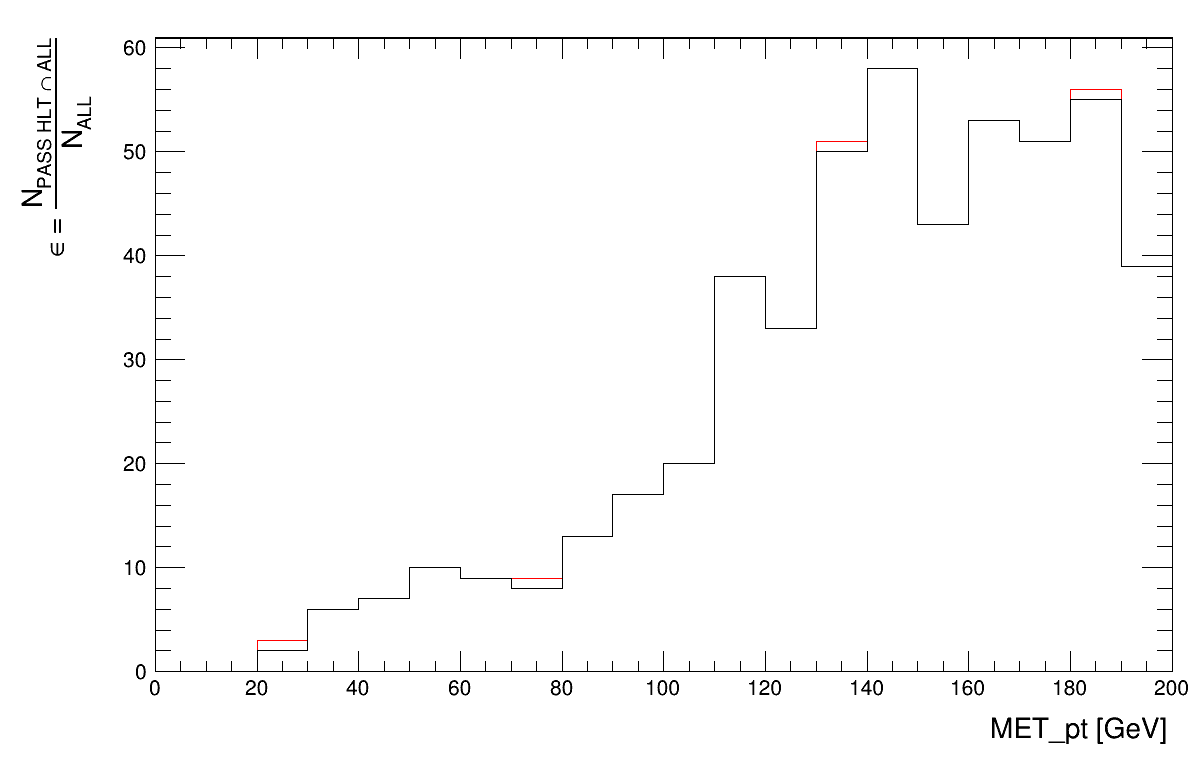

In [7]:
c1 = ROOT.TCanvas("c1","",50,50,1200,800)
c1.Draw()
h_deno_list[3].Draw("HIST")
h_nume_list[3].Draw("HIST SAME")

In [174]:
legend = ROOT.TLegend(0.50, 0.35, 0.70, 0.55)
legend.SetBorderSize(0)
legend.SetFillColor(0)
legend.SetTextSize(0.035)
legend.SetLineWidth(1)
legend.SetLineStyle(2)
h_nume_list[0].SetMarkerStyle(20)
legend.AddEntry(h_nume_list[0],'data')
h_nume_list_MC[0].SetLineColor(2)
h_nume_list_MC[0].SetMarkerStyle(0)
legend.AddEntry(h_nume_list_MC[0],'MC')

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file HLT_eff/HLT_eff_all_w_2018.pdf has been created
Info in <TCanvas::Print>: png file HLT_eff/HLT_eff_all_w_2018.png has been created


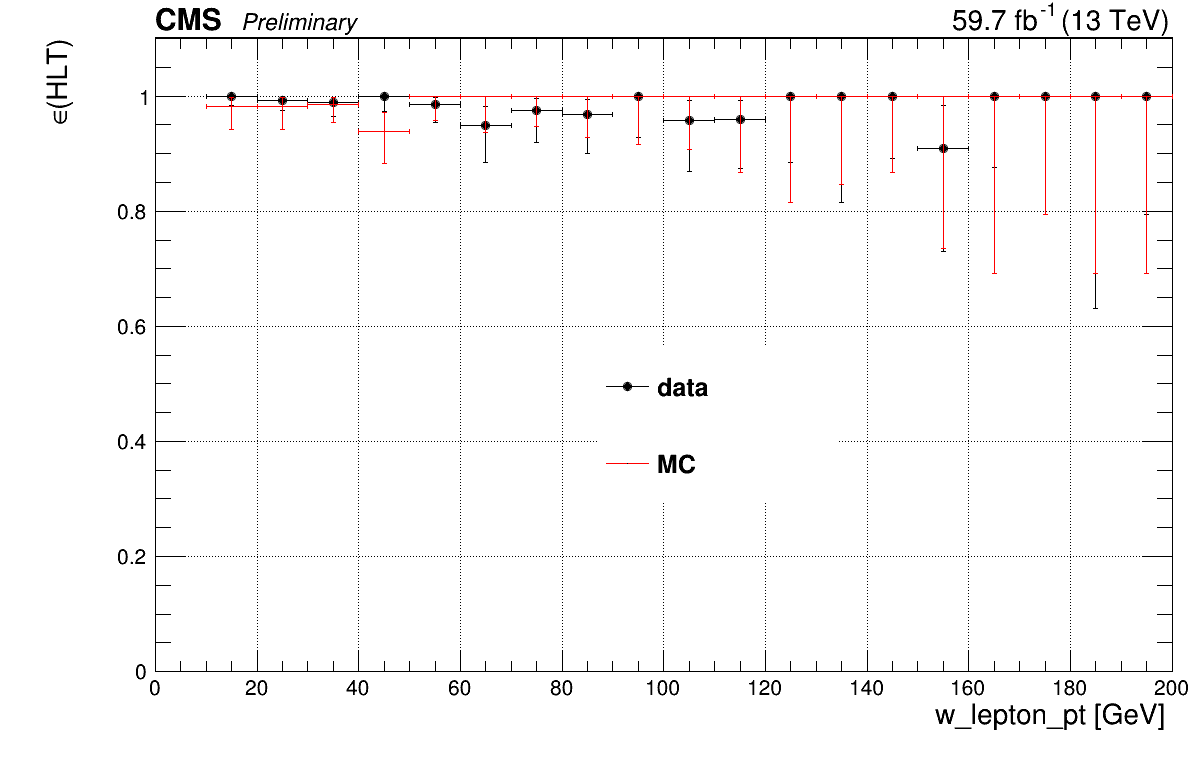

In [197]:
peff = ROOT.TEfficiency(h_nume_list[0], h_deno_list[0])
# peff = ROOT.TEfficiency(h_deno_list[0], h_nume_list[0])
peff.SetMarkerStyle(20)

peff_MC = ROOT.TEfficiency(h_nume_list_MC[0], h_deno_list_MC[0])
peff_MC.SetMarkerStyle(0)
peff_MC.SetLineColor(2)

# peff = h_HLT.Clone("h_eff")
# peff.SetMarkerStyle(21)
# peff.Sumw2()
# peff.Divide(h_total)
# peff.GetYaxis().SetTitle("#epsilon = #frac{N_{PASS HLT #cap ALL}}{N_{ALL}}")
# peff.GetYaxis().SetTitleOffset(1.3)
# peff.GetXaxis().SetTitle(branch+" [GeV]")
# peff.GetXaxis().SetTitleOffset(1.2)
# peff.SetStats(0)


c1 = ROOT.TCanvas("c1","",50,50,1200,800)

c1.Draw()
frame = c1.DrawFrame(0,0,200,1.1)
frame.GetXaxis().SetTitle(branch_list[0]+" [GeV]")
frame.GetYaxis().SetTitle("#epsilon(HLT)")
peff.Draw("SAME")
peff_MC.Draw("SAME")
legend.Draw("SAME")

ROOT.gPad.SetGridy()
ROOT.gPad.SetGridx()
CMS_lumi(c1, 0, 0)
c1.SaveAs('HLT_eff/HLT_eff_all_w_2018.pdf')
c1.SaveAs('HLT_eff/HLT_eff_all_w_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_emumu_w_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_emumu_w_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_muee_w_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_muee_w_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_eee_w_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_eee_w_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_mumumu_w_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_mumumu_w_2018.png')

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file HLT_eff/HLT_eff_all_z1_2018.pdf has been created
Info in <TCanvas::Print>: png file HLT_eff/HLT_eff_all_z1_2018.png has been created


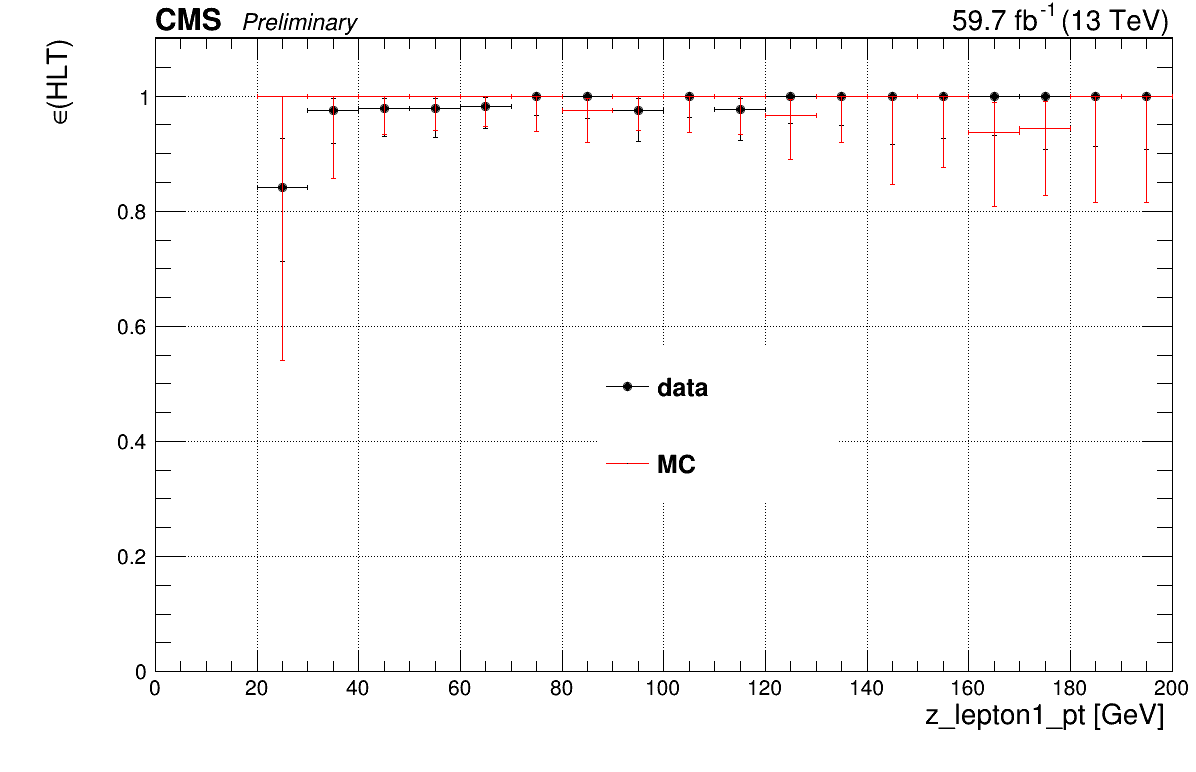

In [198]:
peff = ROOT.TEfficiency(h_nume_list[1], h_deno_list[1])
peff.SetMarkerStyle(20)
peff_MC = ROOT.TEfficiency(h_nume_list_MC[1], h_deno_list_MC[1])
peff_MC.SetMarkerStyle(0)
peff_MC.SetLineColor(2)


c1 = ROOT.TCanvas("c1","",50,50,1200,800)

c1.Draw()
frame = c1.DrawFrame(0,0,200,1.1)
frame.GetXaxis().SetTitle(branch_list[1]+" [GeV]")
frame.GetYaxis().SetTitle("#epsilon(HLT)")
peff.Draw("SAME")
peff_MC.Draw("SAME")
legend.Draw("SAME")

ROOT.gPad.SetGridy()
ROOT.gPad.SetGridx()
CMS_lumi(c1, 0, 0)
c1.SaveAs('HLT_eff/HLT_eff_all_z1_2018.pdf')
c1.SaveAs('HLT_eff/HLT_eff_all_z1_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_emumu_z1_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_emumu_z1_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_muee_z1_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_muee_z1_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_eee_z1_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_eee_z1_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_mumumu_z1_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_mumumu_z1_2018.png')

59.7 fb^{-1} (13 TeV)


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file HLT_eff/HLT_eff_all_z2_2018.pdf has been created
Info in <TCanvas::Print>: png file HLT_eff/HLT_eff_all_z2_2018.png has been created


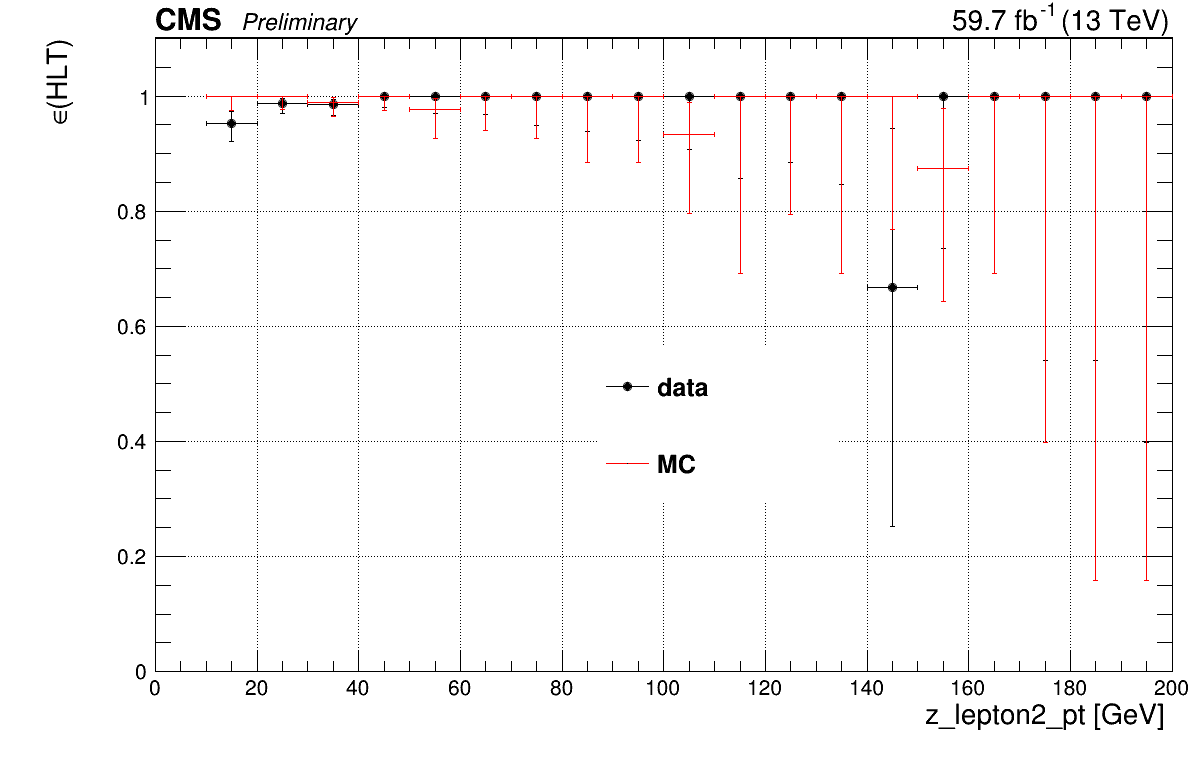

In [199]:
peff = ROOT.TEfficiency(h_nume_list[2], h_deno_list[2])
peff.SetMarkerStyle(20)
peff_MC = ROOT.TEfficiency(h_nume_list_MC[2], h_deno_list_MC[2])
peff_MC.SetMarkerStyle(0)
peff_MC.SetLineColor(2)


c1 = ROOT.TCanvas("c1","",50,50,1200,800)

c1.Draw()
frame = c1.DrawFrame(0,0,200,1.1)
frame.GetXaxis().SetTitle(branch_list[2]+" [GeV]")
frame.GetYaxis().SetTitle("#epsilon(HLT)")
peff.Draw("SAME")
peff_MC.Draw("SAME")
legend.Draw("SAME")

ROOT.gPad.SetGridy()
ROOT.gPad.SetGridx()
CMS_lumi(c1, 0, 0)
c1.SaveAs('HLT_eff/HLT_eff_all_z2_2018.pdf')
c1.SaveAs('HLT_eff/HLT_eff_all_z2_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_emumu_z2_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_emumu_z2_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_eee_z2_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_eee_z2_2018.png')
# c1.SaveAs('HLT_eff/HLT_eff_mumumu_z2_2018.pdf')
# c1.SaveAs('HLT_eff/HLT_eff_mumumu_z2_2018.png')

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


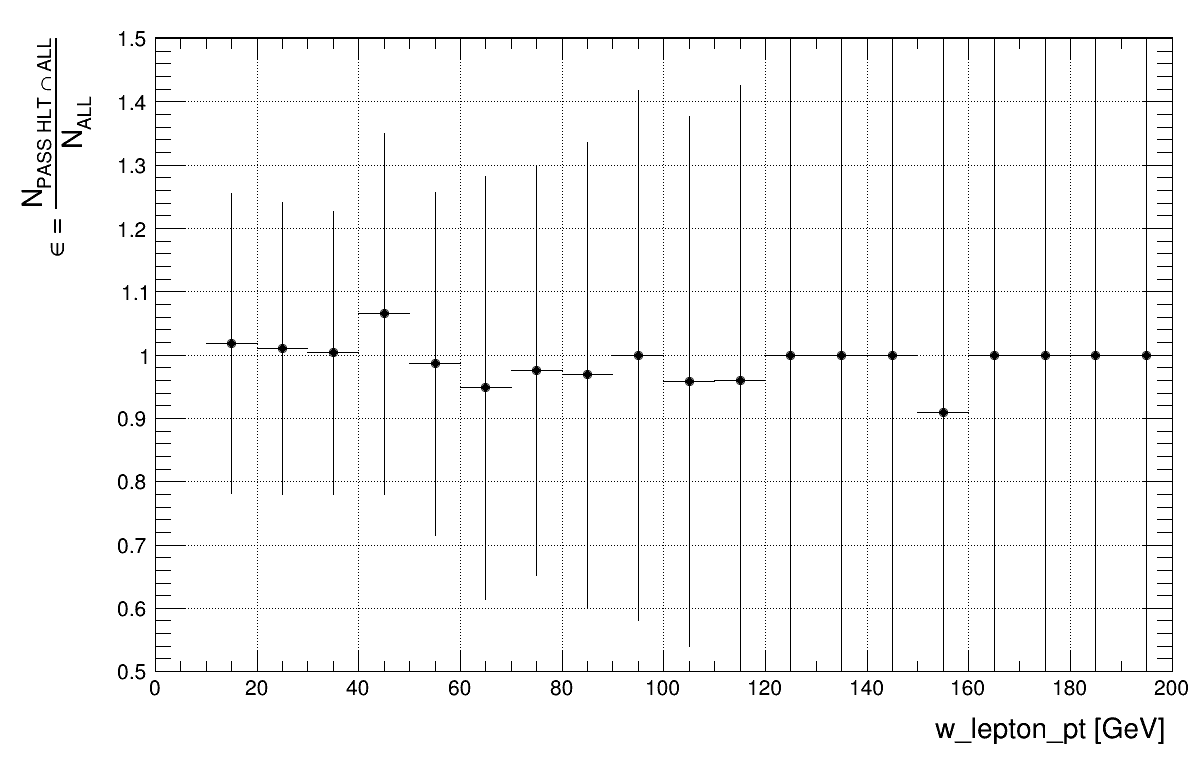

In [200]:
h_ratio1 = h_nume_list[0].Clone()
h_ratio2 = h_nume_list_MC[0].Clone()
h_ratio1.Sumw2()
h_ratio2.Sumw2()
h_ratio1.Divide(h_deno_list[0])
h_ratio2.Divide(h_deno_list_MC[0])
h_ratio = h_ratio1.Clone()
h_ratio.Divide(h_ratio2)
h_ratio.SetMaximum(1.50)
h_ratio.SetMinimum(0.50)
c1.Draw()
h_ratio.Draw('pe')

In [201]:
total = 150+99+89+430
total_pass = 150+96+86+422
level = 0.95

print ('{:.2%}'.format(total_pass/total))
print ('{:.2%}'.format(ROOT.TEfficiency.ClopperPearson(total,total_pass,0.95,1) - total_pass/total))
print ('{:.2%}'.format(ROOT.TEfficiency.ClopperPearson(total,total_pass,0.95,0) - total_pass/total))

98.18%
0.82%
-1.22%
